## Stock Return and Risk analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#AAPL's stock pricr from Jan 01, 2018 to Oct 01, 2020
app = pd.read_csv('C:/Users/Jacob/AAPL.csv')
app.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,41.513580,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,41.506344,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.699139,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,42.173893,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,42.017254,82271200


## Distribution of Log return

In [6]:
#calculating the log daily return
#use log return instead of arithmetic return to remove bias
#detail: https://tradingqna.com/t/why-stock-returns-are-calculated-in-log-scale/806
#np.log = natural log
app['LogReturn'] = np.log(app['Close']).shift(-1) - np.log(app['Close'])

In [7]:
app.head()

,Date,Open,High,Low,Close,Adj Close,Volume,LogReturn
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,41.513580,102223600,-0.000174
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,41.506344,118071600,0.004634
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.699139,89738400,0.011321
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,42.173893,94640000,-0.003721
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,42.017254,82271200,-0.000115


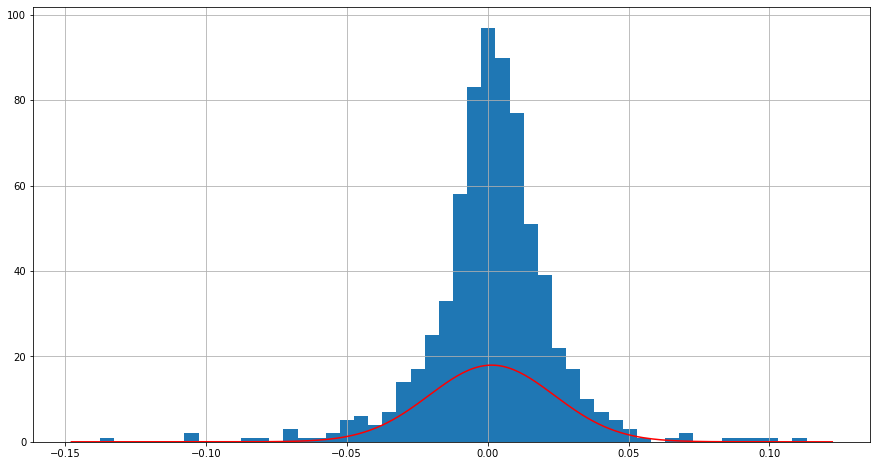

In [8]:
# Plot a histogram to show the distribution of log return of aapl's stock. 
# close to normal distribution
from scipy.stats import norm
mu = app['LogReturn'].mean()
sigma = app['LogReturn'].std(ddof=1) #SD formula, ddof default = 0, denominator=N, ddof=1 means donominator=N-1

density = pd.DataFrame()
density['x'] = np.arange(app['LogReturn'].min()-0.01, app['LogReturn'].max()+0.01, 0.001) #start,stop,step
density['pdf'] = norm.pdf(density['x'], mu, sigma) #normal probability density function

app['LogReturn'].hist(bins=50, figsize=(15, 8)) #frequency of stock return, bar chart
plt.plot(density['x'], density['pdf'], color='red') 
plt.show()

In [9]:
density['x'].shape

(271,)

In [10]:
density['pdf'].shape

(271,)

## The probability of the stock price will drop over a certain percentage in a day

In [11]:
# probability that the stock price of AAPL will drop over 5% in a day, P(X<=-0.05)
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.010317399946851016


In [12]:
# probability that the stock price of AAPL will drop over 10% in a day
prob_return1 = norm.cdf(-0.1, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  2.5001644078743726e-06


## The probability of the stock price will drop over a certain percentage in a year

In [13]:
# drop over 40% in 252 transaction days
mu252 = 252*mu #assuming the stock returns are independent, but this is quite wrong
#X~(MUx,VARx),Y~(MUy,VARy),x=day1,y=day2, Z~(MUx+MUy,VARx+VARy)
sigma252 = (252**0.5) * sigma
print('The probability of dropping over 40% in 252 days is ', norm.cdf(-0.4, mu252, sigma252))

The probability of dropping over 40% in 252 days is  0.015513276874696447


In [14]:
# drop over 20% in 252 days
mu252 = 252*mu
sigma252 = (252**0.5) * sigma
drop20 = norm.cdf(-0.2, mu252, sigma252)
print('The probability of dropping over 20% in 252 days is ', drop20)

The probability of dropping over 20% in 252 days is  0.05594653191488936


## Calculate Value at risk (VaR)

In [15]:
# Value at risk(VaR), a measure of the risk of loss for investments
#ppf is the inverse of the CDF
#refer to https://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm#:~:text=Percent%20Point%20Function,as%20the%20inverse%20distribution%20function.
#CDF->given x, calculate prob(x<=X) PPF->given prob, calculate corresponding x)
#given prob, calculate the amount of investment might loss
#5%quantile, VaR at the level of 95%
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.03511788034809831


In [16]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.03511788034809831
95% quantile  0.0379810940120815


In [17]:
# to calcuate the 25% and 75% Quantile of the return
# 25% quantile
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile ', q25)
# 75% quantile
q75 = norm.ppf(0.75, mu, sigma)
print('75% quantile ', q75)

25% quantile  -0.013555899699871395
75% quantile  0.0164191133638546


In [18]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

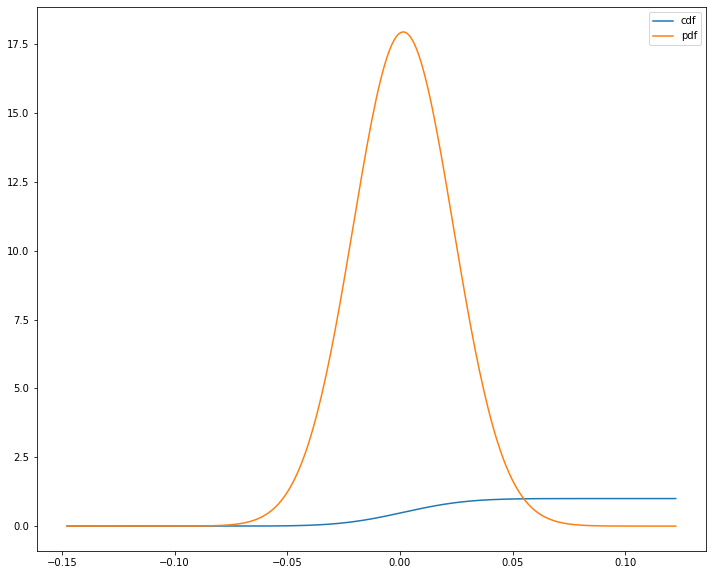

In [19]:
plt.figure(figsize=(12, 10)) ##change size to 50 to see cdf approaches 1
stock_pdf = stats.norm.pdf(density['x'], mu, sigma)
stock_cdf = stats.norm.cdf(density['x'], mu, sigma)
plt.plot(density['x'], stock_cdf, label='cdf')
plt.plot(density['x'], stock_pdf, label='pdf')
plt.legend();
